In [8]:
import sys
sys.path.append("../../") 

from definitions import *
from module.models.utils.utils import load_best_model_parameters
from module.models.mlp import MLP

import json
import pandas as pd


def saved_models_parameters_generator(results_file):
    with open(results_file) as json_file:
        data = json.load(json_file)

        for i, node in enumerate(data):
            yield node['params'], node['scores'], node['model_path']
            
            
def load_best_model_parameters(model_directory, results_file, best_on='test', condition='min'):
    cv_scores = []
    data = []

    condition_index = 0
    if best_on == 'val':
        condition_index = 1
    elif best_on == 'test':
        condition_index = 2

    condition_lambda = lambda x: x.argmin()
    if condition == 'max':
        condition_lambda = lambda x: x.argmax()

    for (parameters, scores, model_path) in saved_models_parameters_generator(os.path.join(results_file)):
        data.append([parameters, scores, model_path])
        cv_scores.append([scores['train'], scores['val'], scores['test']])

    cv_scores = np.array(cv_scores)
    best_model_index = condition_lambda(cv_scores[:, condition_index])
    
    best_parameters = data[best_model_index][0]
    best_scores = data[best_model_index][1]
    best_model_path = data[best_model_index][2]

    cv_scores_file = os.path.join(best_model_path, 'cv_scores.csv')
    cv_scores_data = pd.read_csv(cv_scores_file)

    best_model_index = condition_lambda(cv_scores_data[best_on].values)
    best_fold_path = os.path.join(best_model_path, '{}_fold'.format(best_model_index))

    if not os.path.exists(best_fold_path):  # for older version of experiment structure
        best_fold_path = os.path.join(best_model_path, str(best_model_index))

    return best_parameters, best_scores, best_model_path, cv_scores_data, best_fold_path

In [60]:
experiment_dir = path_join(MODELS_DIR, 'predict_age/mlp')
results_file = 'C:/Users/HWer/Documents/GitHub/CrossPlatformNormalization/CrossPlatformNormalization/tmp/cv_results_mlp.json'

best_parameters, best_scores, best_model_path, _, _ = load_best_model_parameters(
    experiment_dir,
    results_file,
)
print(best_parameters)
print(best_scores)
print(best_model_path)

{'features_count': 1000, 'layers': [512, 256, 128, 1], 'activation': 'lrelu', 'output_activation': 'linear', 'drop_rate': 0.75, 'regularizer_name': 'l1_l2', 'regularizer_param': 0.0001, 'initializer': 'glorot_normal', 'optimizer_name': 'rmsprop', 'epochs_count': 2000, 'learning_rate_decay_method': 'on_plato', 'learning_rate': 0.0001, 'loss': 'mae', 'batch_size': 128, 'patience': 200}
{'train': 5.098262157268438, 'val': 6.39461719909812, 'test': 12.704128985813686}
/home/aonishchuk/projects/CPN2/models/predict_age/mlp/cv_19


In [59]:
experiment_dir = path_join(MODELS_DIR, 'predict_age/mlp')
results_file = 'C:/Users/HWer/Documents/GitHub/CrossPlatformNormalization/CrossPlatformNormalization/tmp/cv_results_dae.json'

best_parameters, best_scores, best_model_path, _, _ = load_best_model_parameters(
    experiment_dir,
    results_file,
)
print(best_parameters)
print(best_scores)
print(best_model_path)

{'features_count': 1000, 'layers': [[1000, 512, 256, 64], [256, 512, 1000]], 'activation': 'lrelu', 'output_activation': 'linear', 'drop_rate': 0.0, 'regularizer_name': 'l1_l2', 'regularizer_param': 1e-05, 'initializer': 'glorot_normal', 'optimizer_name': 'adam', 'epochs_count': 2000, 'learning_rate_decay_method': 'on_plato', 'learning_rate': 0.001, 'loss': 'mae', 'batch_size': 128, 'patience': 200}
{'train': 0.5861383847456934, 'val': -999.5853026520005, 'test': -2408333.177056011}
/home/aonishchuk/projects/CPN2/models/genes_normalization/dae/trained_models/cv_56


In [13]:
print(best_fold_path)

D:/Datasets/InsilicoMedicine/models/predict_age/mlp\trained_models\cv_1\2_fold


In [45]:
experiment_dir = path_join(MODELS_DIR, 'D:/Datasets/InsilicoMedicine/models/generator/genes_normalization/dae2')
results_file = 'D:/Datasets/InsilicoMedicine/models/generator/genes_normalization/dae/cv_results.json'

best_parameters, best_scores, best_model_path, cv_scores_data, best_fold_path = load_best_model_parameters(
    experiment_dir,
    results_file,
    condition='max',
)
print(best_parameters)
print(best_scores)
print(best_model_path)

print(best_fold_path)

print(cv_scores_data)

{'features_count': 1000, 'layers': [[1000, 512, 256, 64], [256, 512, 1000]], 'activation': 'lrelu', 'output_activation': 'linear', 'drop_rate': 0.0, 'regularizer_name': 'l1_l2', 'regularizer_param': 1e-05, 'initializer': 'glorot_normal', 'optimizer_name': 'adam', 'epochs_count': 2000, 'learning_rate_decay_method': 'on_plato', 'learning_rate': 0.001, 'loss': 'mae', 'batch_size': 128, 'patience': 200}
{'train': 0.2869802274878087, 'val': 0.23197786530405984, 'test': 0.27314150165686973}
D:/Datasets/InsilicoMedicine/models/generator/genes_normalization/dae\trained_models\cv_34
D:/Datasets/InsilicoMedicine/models/generator/genes_normalization/dae\trained_models\cv_34\1_fold
      train       val      test title
0  0.269510  0.210686  0.274172  cv_0
1  0.287187  0.240379  0.274969  cv_1
2  0.288474  0.251637  0.272187  cv_2
3  0.291219  0.219889  0.272145  cv_3
4  0.298512  0.237297  0.272235  cv_4
5  0.286980  0.231978  0.273142  mean


D:/Datasets/InsilicoMedicine/models/generator/genes_normalization/dae\trained_models\cv_34\0_fold\loss_history


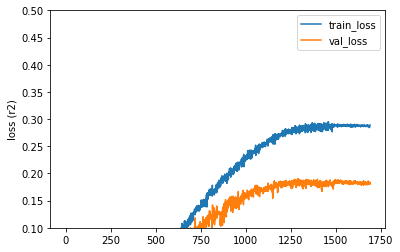

In [55]:
import pickle

file_name = os.path.join(best_model_path, '0_fold\loss_history')
print(file_name)
with open(file_name, 'rb') as file:
    data = pickle.load(file)

import matplotlib.pyplot as plt
plt.plot(data['coeff_determination'], label='train_loss')
plt.plot(data['val_coeff_determination'], label='val_loss')
plt.ylabel('loss (r2)')
plt.ylim(0.1, 0.5)
plt.legend()
plt.savefig('genes_norm_dae')

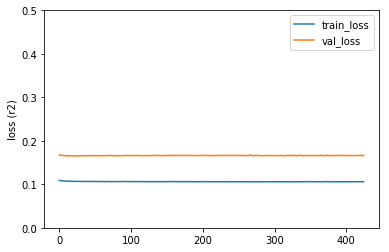

{'train_results': {'mae': 16.96177865115079, 'r2': -1.0365169309270734}, 'test_results': {'mae': 16.796353326094778, 'r2': -0.05888416943761965}}
D:/Datasets/InsilicoMedicine/models/generator/predict_age_log_data/mlp/loss_history
dict_keys(['val_loss', 'val_coeff_determination', 'loss', 'coeff_determination', 'lr'])


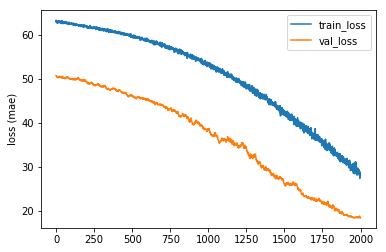

In [50]:
experiment_dir = path_join(MODELS_DIR, 'D:/Datasets/InsilicoMedicine/models/generator/predict_age_log_data/mlp')
results_file = 'D:/Datasets/InsilicoMedicine/models/generator/predict_age_log_data/mlp/results.json'

with open(results_file) as json_file:
    data = json.load(json_file)
    
    print(data)

import pickle

file_name = 'D:/Datasets/InsilicoMedicine/models/generator/predict_age_log_data/mlp/loss_history'
print(file_name)
with open(file_name, 'rb') as file:
    data = pickle.load(file)

print(data.keys())
    
import matplotlib.pyplot as plt
plt.plot(data['loss'], label='train_loss')
plt.plot(data['val_loss'], label='val_loss')
plt.ylabel('loss (mae)')
# plt.ylim(0, 0.5)
plt.legend()
plt.savefig('predict_age_log_data')

In [ ]:
experiment_dir = path_join(MODELS_DIR, 'D:/Datasets/InsilicoMedicine/models/generator/predict_age_log_data/mlp')
results_file = 'D:/Datasets/InsilicoMedicine/models/generator/genes_normalization/daep3/dae/results.json'

with open(results_file) as json_file:
    data = json.load(json_file)
    
    print(data)

import pickle

file_name = 'D:/Datasets/InsilicoMedicine/models/generator/genes_normalization/daep3/dae/loss_history'
print(file_name)
with open(file_name, 'rb') as file:
    data = pickle.load(file)

print(data.keys())
    
import matplotlib.pyplot as plt
plt.plot(data['loss'], label='train_loss')
plt.plot(data['val_loss'], label='val_loss')
plt.ylabel('loss (mae)')
# plt.ylim(0, 0.5)
plt.legend()
plt.savefig('genes_norm_daep')